Linear Regression Training Project: E-commerce Clients
This project uses a dataset from Kaggle with information about customers of an online store. The data includes:

*Avg. Session Length: Average time spent in in-store style advice sessions.

*Time on App: Average minutes spent on the mobile app.

*Time on Website: Average minutes spent on the website.

*Length of Membership: How many years the customer has been a member.

The goal is to help the company decide whether it should invest more in improving the mobile app or the website, using data to guide the decision.

Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Getting the Data and creating dataframe

In [4]:
customers = pd.read_csv(r'C:\Users\Anete\Downloads\archive (3)\Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Data Exploratory

First we ask the following question: How are the client's time spent on each platform related to the amount that they spend per year? There doesn't seem to be much correlation between the time on the desktop website with the amount that clients spend per year. On the other side, the second graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone. Maybe the payment process is faster on the app or the calls-to-action are more successful there.

After analysing the pairplot, we see that there does seem to be one big positive correlation between two variables: the length of membership and the yearly expenditure. In the end we recrate this plot to visualise the regression line.

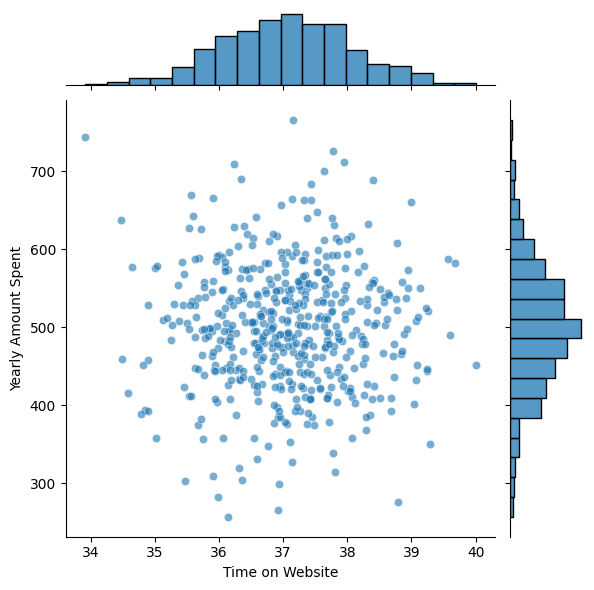

In [12]:
# time on website vs yearly amount spent

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.6)


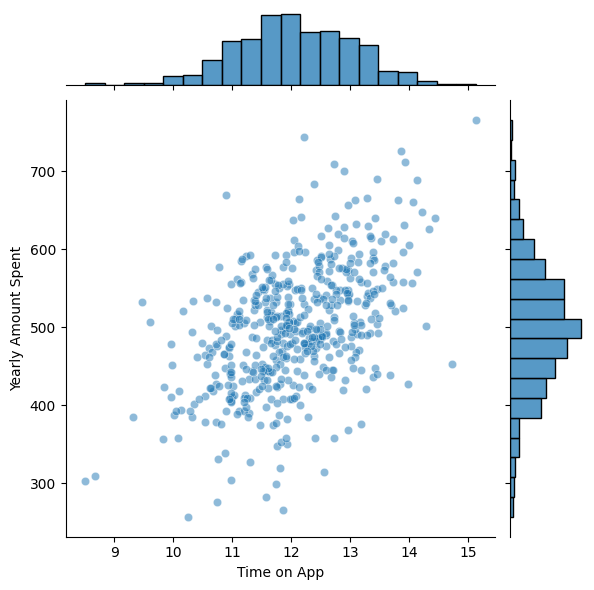

In [13]:
# time on app vs yearly amount spent

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

Jointplot using Seaborn, which shows the relationship between two variables. The alpha parameter makes the points slightly transparent, so overlapping data is easier to see. Along with the scatterplot in the center, the plot also displays histograms for each variable on the axes. This visualization helps identify trends, correlations, and data distribution.

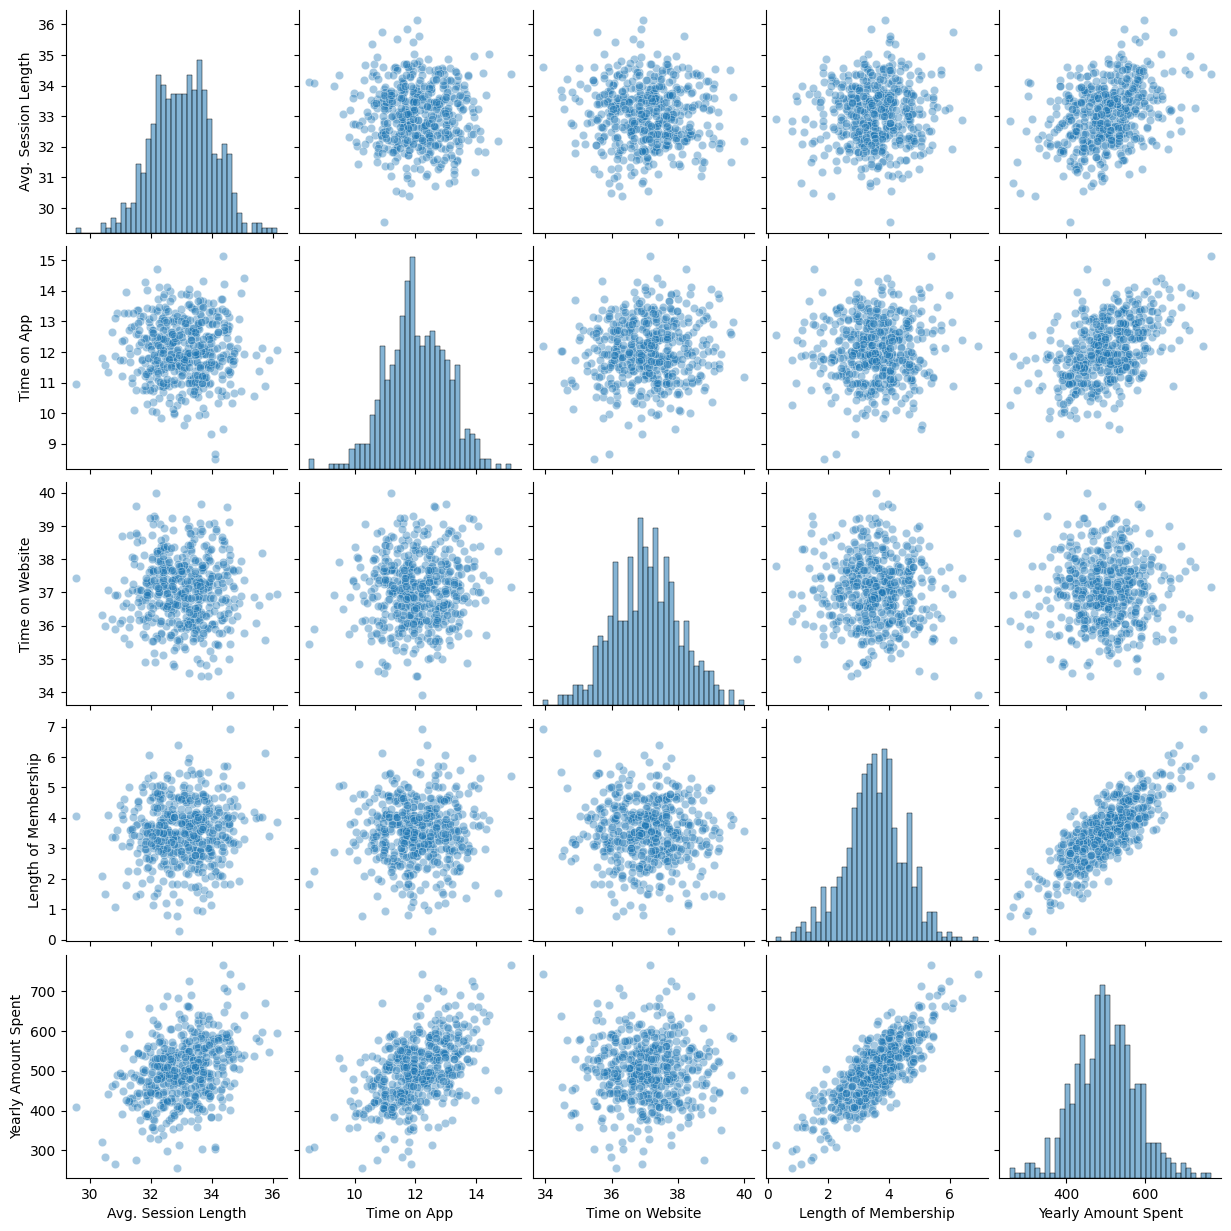

In [14]:
sns.pairplot(customers, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

Pairplot plots scatterplots for every pair of numerical variables. The kind='scatter' ensures scatterplots are used in the off-diagonal cells. On the diagonal, it shows histograms with 40 bins. This visualization is useful to quickly explore correlations, patterns, and distributions across all features in the dataset.

Import library for Data Split


In [93]:
from sklearn.model_selection import train_test_split


train_test_split  is used to split a dataset into training and testing subsets. The training set is used to fit the model, while the testing set is used to evaluate how well the model generalizes to unseen data. It’s a fundamental step in building and validating machine learning models.

Perform 80/20 Data Split


In [36]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


train_test_split splits the data into training and testing sets, where 80% is used for training and 20% is used for testing

In [26]:
X.head(),y.head()


(   Avg. Session Length  Time on App  Time on Website  Length of Membership
 0            34.497268    12.655651        39.577668              4.082621
 1            31.926272    11.109461        37.268959              2.664034
 2            33.000915    11.330278        37.110597              4.104543
 3            34.305557    13.717514        36.721283              3.120179
 4            33.330673    12.795189        37.536653              4.446308,
 0    587.951054
 1    392.204933
 2    487.547505
 3    581.852344
 4    599.406092
 Name: Yearly Amount Spent, dtype: float64)

In [72]:
y.min(),y.max()

(np.float64(256.67058229005585), np.float64(765.5184619388372))

Data Dimension

In [23]:
X_train.shape, y_train.shape


((400, 4), (400,))

In [29]:
X_test.shape, y_test.shape


((100, 4), (100,))

Linear Regression Model


Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. These estimators define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well.

The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the residuals. Regression is about determining the best predicted weights—that is, the weights corresponding to the smallest residuals.

To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of ordinary least squares.



Training the Model with multivariable regression using Scikit Learn


In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output (yearly expenditure). 

In [30]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
model = LinearRegression().fit(X, y)


Coefficient of determination (𝑅²) with .score(). The coefficient of determination tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱, using the particular regression model. A larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

In [ ]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.9843155370226726


The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁

In [48]:
coef_inter = model.intercept_
print('Intercept:', coef_inter)

Intercept: -1051.5942553006257


In [61]:
coef_i = model.coef_
pd.DataFrame(coef_i,X.columns,columns=['Values'])


,Values
Avg. Session Length,25.734271
Time on App,38.709154
Time on Website,0.436739
Length of Membership,61.577324


As the dataframe suggested, we find that the most important coefficient is that of the "Length of Membership" predictor, followed by the 'Time on App' and the 'Avg. Session Length'. The time on website does not seem to be an important factor to the amount a customer spends per year.

Predicting Values

In [82]:
y_pred = model.predict(X_test)
y_pred

array([408.25429025, 461.72642167, 444.75531509, 535.09718129,
       395.53305892, 590.55933152, 508.46556631, 472.65793552,
       445.26118373, 315.4499197 , 480.82989727, 590.18504811,
       370.50278378, 487.86923804, 588.71131759, 283.10828346,
       574.73279528, 523.10948166, 399.1668672 , 355.74838603,
       518.5918905 , 452.11437396, 578.24422968, 511.31229882,
       432.65667658, 532.31652489, 553.01335985, 432.86391365,
       526.77706868, 424.07621503, 556.72912918, 441.02741758,
       395.74624311, 623.21313089, 424.90775556, 532.35651023,
       584.13766535, 548.72107381, 430.99821788, 482.11878307,
       342.29774184, 576.54968292, 574.07102444, 551.92735934,
       503.43534071, 476.46126743, 457.23980569, 431.83265885,
       535.01473605, 435.53778567, 474.70405462, 513.86329374,
       408.64776604, 598.86435708, 543.20039152, 594.73928806,
       481.19281459, 752.52310497, 472.02824618, 443.08486972,
       482.06464605, 394.2796933 , 431.78042946, 478.45

Mean Squared Error (MSE), It’s simply the average of SSR(Sum of Squared Residuals) (per observation).Easier to interpret and compare across datasets of different sizes.

In [75]:
mse = mean_squared_error(y_test,Y_pred)
mse

99.65988026568593

Root Mean Squared Error (RMSE) is a common metric to measure the accuracy of a regression model.It’s the average prediction error, but expressed in the same units as the target variable. That makes it easier to interpret than MSE, (which is in squared units).

In [78]:
rmse = np.sqrt(mse)
rmse

np.float64(9.982979528461728)

That means this model’s predictions are, on average, about $10 off from the actual Yearly Amount Spent.

Scatter plots


In [83]:
np.array(y_test)


array([408.62018783, 459.28512346, 463.59141803, 543.13262629,
       407.65717876, 586.15587018, 486.94705384, 462.89763615,
       439.07476674, 308.52774656, 497.77864222, 584.21831349,
       374.26967454, 494.63860976, 585.9318443 , 266.08634095,
       565.9943634 , 528.4193297 , 390.10327297, 356.61556789,
       502.4097853 , 463.92351299, 581.79879768, 493.18021625,
       451.62861054, 535.32161009, 550.04758058, 424.72877393,
       531.96155055, 414.93506065, 557.634109  , 427.1993849 ,
       409.07047205, 614.71533383, 434.02169975, 528.93361857,
       573.30622226, 549.00822693, 447.3690272 , 482.35357032,
       350.05820016, 576.02524413, 582.49192373, 563.44603567,
       506.13234244, 486.0834255 , 452.627255  , 445.06218551,
       524.79762757, 408.21690177, 475.75906779, 513.15311185,
       403.7669021 , 597.73987888, 537.8252823 , 587.95105397,
       479.24741678, 744.2218671 , 465.17662331, 424.76263551,
       484.87696494, 424.18549429, 439.99787994, 469.31

In [84]:
y_pred

array([408.25429025, 461.72642167, 444.75531509, 535.09718129,
       395.53305892, 590.55933152, 508.46556631, 472.65793552,
       445.26118373, 315.4499197 , 480.82989727, 590.18504811,
       370.50278378, 487.86923804, 588.71131759, 283.10828346,
       574.73279528, 523.10948166, 399.1668672 , 355.74838603,
       518.5918905 , 452.11437396, 578.24422968, 511.31229882,
       432.65667658, 532.31652489, 553.01335985, 432.86391365,
       526.77706868, 424.07621503, 556.72912918, 441.02741758,
       395.74624311, 623.21313089, 424.90775556, 532.35651023,
       584.13766535, 548.72107381, 430.99821788, 482.11878307,
       342.29774184, 576.54968292, 574.07102444, 551.92735934,
       503.43534071, 476.46126743, 457.23980569, 431.83265885,
       535.01473605, 435.53778567, 474.70405462, 513.86329374,
       408.64776604, 598.86435708, 543.20039152, 594.73928806,
       481.19281459, 752.52310497, 472.02824618, 443.08486972,
       482.06464605, 394.2796933 , 431.78042946, 478.45

In a good model all points would lie exactly on a 45° diagonal line (y_pred = y_test) or Points are close to that diagonal, maybe with some spread. Small deviations = small errors → low MSE/RMSE.

Text(0, 0.5, 'Yearly Amont Spent Prediction')

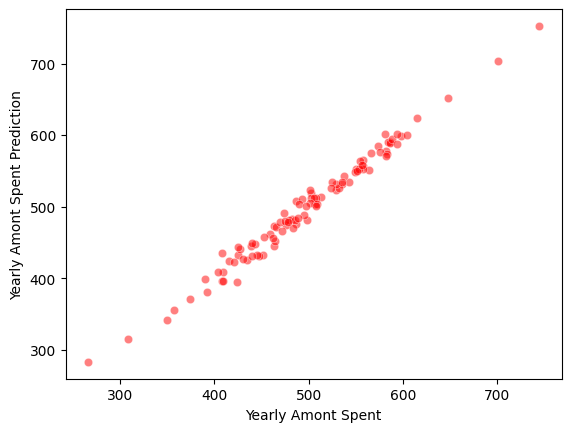

In [92]:
sns.scatterplot(x = y_test , y= y_pred, color='red', alpha=0.5)
plt.xlabel('Yearly Amont Spent')
plt.ylabel('Yearly Amont Spent Prediction')


Residuals

Text(0.5, 0, 'Residuals')

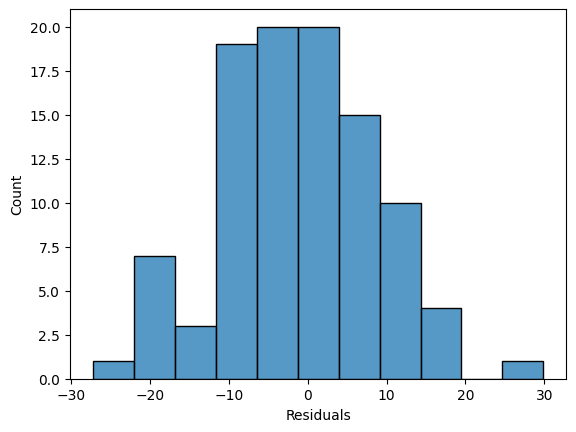

In [97]:
residuals = y_test-y_pred
sns.histplot(residuals)
plt.xlabel('Residuals')


Residuals vs Fitted Values

To assess homoscedasticity, which means the spread of residuals should be roughly constant, we must check whether the variance of residuals changes across the range of fitted values. If the spread of residuals stays consistent, the assumption of homoscedasticity is satisfied. If the spread widens or narrows, it indicates heteroscedasticity, which can be problematic. 

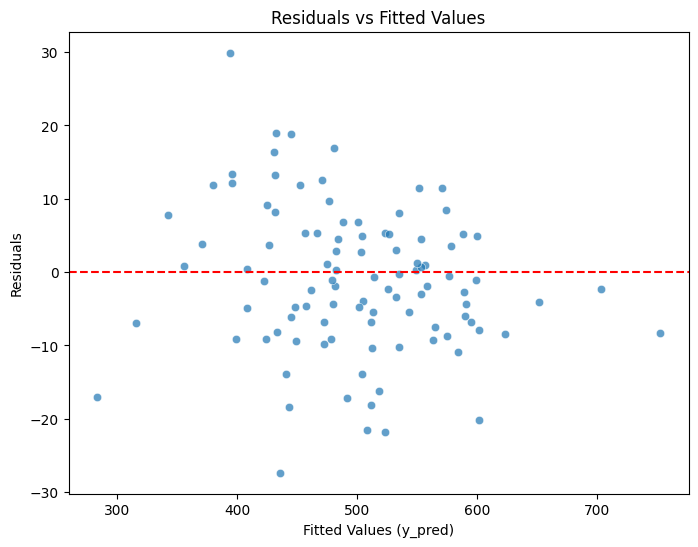

In [98]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)

# 3. Add a horizontal line at 0 (ideal residual line)
plt.axhline(y=0, color='red', linestyle='--')

# 4. Label axes
plt.xlabel("Fitted Values (y_pred)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")

plt.show()

The residuals vs fitted values chart shows that the residuals are centered around zero, indicating that the model captures the overall trend of the data. The spread of residuals appears fairly constant across the range of fitted values, suggesting that the assumption of homoscedasticity is reasonably satisfied. There is no strong funnel shape or systematic pattern, which supports the appropriateness of the linear model. However, a few outliers with large residuals are present and may require further examination. Overall, the residual plot supports the validity of the regression model while highlighting some potentially influential points.